# Simple Linear Regression

In this notebook I used data on house sales in King County to predict house prices using simple (one input) linear regression.
* I used pandas descripttive to compute summary statistics
* I computed the Simple Linear Regression weights using the closed form solution
* I made predictions of the output given the input feature
* I also tried turning the regression around to predict the input given the output
* Finally, I compare two different models for predicting house prices

The library I used in this notebook was pandas and matplot lib.

# Import library 

In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import kendalltau
import seaborn as sns
sns.set(color_codes=True)

# Load house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

The following section is to load the entire dataset in and made a dictionary of column names and data type as this was used latter when importing training datset and test dataset

In [28]:
data = pd.read_csv("kc_house_data.csv")
colname_lst = list(data.columns.values)
coltype_lst =  [str, str, float, float, float, float, int, str, int, int, int, int, int, int, int, int, str, float, float, float, float]
col_type_dict = dict(zip(colname_lst, coltype_lst))


# Split data into training data and test data 

From the entire dataset above, we spit data into training and test set using numpy.

In [29]:
idx = np.random.rand(len(data)) < 0.8
train = data[idx]
test = data[~idx]

In [30]:
#inspect first five elements in the training set
train.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [31]:
#inspect first five elements in the test set
test.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
21,2524049179,20140826T000000,2000000,3,2.75,3050,44867,1,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
39,2078500320,20140620T000000,605000,4,2.50,2620,7553,2,0,0,...,8,2620,0,1996,0,98056,47.5301,-122.180,2620,11884
41,7766200013,20140811T000000,775000,4,2.25,4220,24186,1,0,0,...,8,2600,1620,1984,0,98166,47.4450,-122.347,2410,30617


# Now let's look at descriptive statistics for this data set

In [33]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.739000e+04,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000,17390.000000
mean,4.575685e+09,541318.873030,3.372110,2.116504,2083.497642,15006.152904,1.495428,0.007648,0.233065,3.411731,7.659172,1791.156699,292.340943,1970.874238,84.791547,98077.920184,47.560085,-122.213576,1989.652904,12752.935135
std,2.873737e+09,372663.331692,0.935221,0.772936,922.629150,39949.231571,0.540732,0.087121,0.767024,0.651906,1.182737,832.591525,442.982057,29.388191,402.510965,53.479219,0.138265,0.140297,687.700106,26725.787448
min,1.000102e+06,75000.000000,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.515000,460.000000,651.000000
25%,2.122059e+09,321000.000000,3.000000,1.500000,1430.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.250000,0.000000,98033.000000,47.471300,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,450000.000000,3.000000,2.250000,1920.000000,7620.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7620.000000
75%,7.300401e+09,643302.750000,4.000000,2.500000,2550.000000,10702.750000,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,570.000000,1997.000000,0.000000,98118.000000,47.677700,-122.124000,2370.000000,10075.000000
max,9.895000e+09,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


# Data visualisation 

In addition to descriptive statistics, data visualisation also helps to understand the gist of data. Therefore we will spend a bit of time looking at some of the variables, we interested.

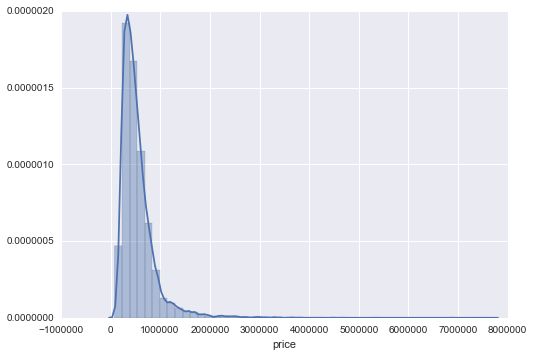

In [47]:
sns.distplot(train["price"]);

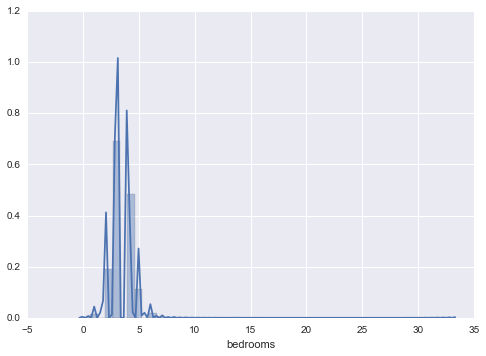

In [48]:
sns.distplot(train["bedrooms"])

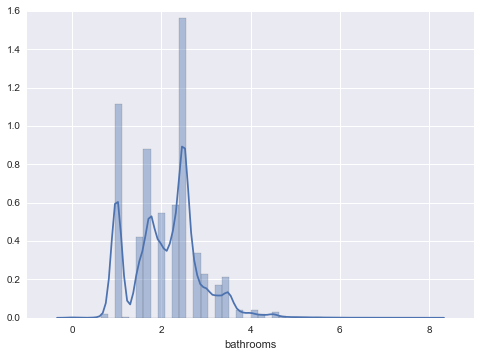

In [49]:
sns.distplot(train["bathrooms"])

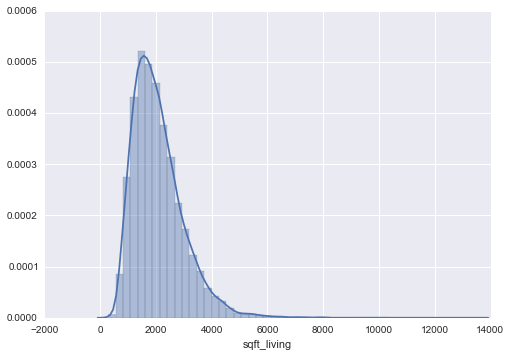

In [50]:
sns.distplot(train["sqft_living"])

# Build a generic simple linear regression function 

This section we will create generic simple linear regression function. This function will take two parameters. 
* one parameter is for input variable
* the other one is for output variable

aim: we want to find the line that give the least residual sum of square (RSS).
$$RSS(w_0,w_1) = \sum_{i=1}^{N} (y_i-[w_0+w_1x_i])^{2} $$

take derivation of the above function gives:
$$\frac{\partial RSS(w_0,w_1)}{\partial w_i} = \begin{bmatrix}-2\sum_{i=1}^{N}  (y_i-[w_0+w_1x_i])\\ -2\sum_{i=1}^{N}  (y_i-[w_0+w_1x_i])x_i\end{bmatrix} $$

Then, we set gradient to 0. <br />
Top term will be:
$$ \hat{w_0} = \frac{ \sum_{i=1}^{N} y_i}{N} - \frac{\hat{w_1} \sum_{i=1}^{N} x_i} {N}$$

Bottom term will be:
$$ \hat{w_1} = \frac {\sum y_ix_i - \frac{\sum y_i \sum x_i}{N}}{ \sum x_i^2 - \frac {(\sum x_i)^2}{N} }$$

which these will be implemented below.

In [52]:
def simple_linear_regression(input_feature, output):
    # compute the sum of input_feature and output
    input_sum = input_feature.sum()
    output_sum = output.sum()
    # compute the product of the output and the input_feature and its sum
    product_of_input_output = (input_feature*output).sum()
    # compute the squared value of the input_feature and its sum
    sum_of_sqrt_input = (input_feature*input_feature).sum()
    # use the formula for the slope or the top term
    slope = (product_of_input_output-(input_sum*output_sum/output.size))/(sum_of_sqrt_input-input_sum*input_sum/output.size)
    # use the formula for the intercept or the bottom term
    intercept = output_sum/output.size - slope*input_sum/output.size 
    return (intercept, slope)

We can test that our function works by passing it something where we know the answer. In particular we can generate a feature and then put the output exactly on a line: output = 1 + 1\*input_feature then we know both our slope and intercept should be 1

In [54]:
test_feature = pd.DataFrame(range(5))
test_output = pd.DataFrame(1+1*test_feature)
(test_intercept, test_slope) =  simple_linear_regression(test_feature, test_output)
print "Intercept: " + str(test_intercept[0])
print "Slope: " + str(test_slope[0])

Intercept: 1.0
Slope: 1.0


Now that we know it works. Let's build a regression model for predicting price based on sqft_living. Rembember that we train on train_data!

In [55]:
sqft_intercept, sqft_slope = simple_linear_regression(train_data['sqft_living'], train_data['price'])

print "Intercept: " + str(sqft_intercept)
print "Slope: " + str(sqft_slope)

Intercept: -47116.0790729
Slope: 281.95883963


# Predicting Values

Now that we have the model parameters: intercept & slope we can make predictions. The following function will return the predicted output given the input_feature, slope and intercept:

In [58]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + slope*input_feature
    return predicted_values

Now that we can calculate a prediction given the slope and intercept let's make a prediction. Now we will predict the estimated price for a house with 2650 squarefeet according to the squarefeet model we estiamted above.

In [59]:
my_house_sqft = 2650
estimated_price = get_regression_predictions(my_house_sqft, sqft_intercept, sqft_slope)
print "The estimated price for a house with %d squarefeet is $%.2f" % (my_house_sqft, estimated_price)

The estimated price for a house with 2650 squarefeet is $700074.85


# Residual Sum of Squares

Now that we have a model and can make predictions let's evaluate our model using Residual Sum of Squares (RSS). Recall that RSS is the sum of the squares of the residuals and the residuals is just a fancy word for the difference between the predicted output and the true output. 

The following function to compute the RSS of a simple linear regression model given the input_feature, output, intercept and slope:

In [18]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # First get the predictions
    predicted_values_series = intercept + slope*input_feature
    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residual_series = output - predicted_values_series
    # square the residuals and add them up
    residual_square_series = residual_series * residual_series 
    RSS = residual_square_series.sum()
    return(RSS)

Let's test our get_residual_sum_of_squares function by applying it to the test model where the data lie exactly on a line. Since they lie exactly on a line the residual sum of squares should be zero!

In [19]:
print get_residual_sum_of_squares(test_feature, test_output, test_intercept, test_slope) # should be 0.0

0    0.0
dtype: float64


Now use your function to calculate the RSS on training data from the squarefeet model calculated above.

**Quiz Question: According to this function and the slope and intercept from the squarefeet model What is the RSS for the simple linear regression using squarefeet to predict prices on TRAINING data?**

In [27]:
rss_prices_on_sqft = get_residual_sum_of_squares(train_data['sqft_living'], train_data['price'], sqft_intercept, sqft_slope)
print 'The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft)

The RSS of predicting Prices based on Square Feet is : 1.20191835418e+15


# Predict the squarefeet given price

What if we want to predict the squarefoot given the price? Since we have an equation y = a + b\*x we can solve the function for x. So that if we have the intercept (a) and the slope (b) and the price (y) we can solve for the estimated squarefeet (x).

Comlplete the following function to compute the inverse regression estimate, i.e. predict the input_feature given the output!

In [21]:
def inverse_regression_predictions(output, intercept, slope):
    # solve output = intercept + slope*input_feature for input_feature. Use this equation to compute the inverse predictions:
    estimated_feature = (output-intercept)/slope
    return estimated_feature

Now that we have a function to compute the squarefeet given the price from our simple regression model let's see how big we might expect a house that costs $800,000 to be.

**Quiz Question: According to this function and the regression slope and intercept from (3) what is the estimated square-feet for a house costing $800,000?**

In [22]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print "The estimated squarefeet for a house worth $%.2f is %d" % (my_house_price, estimated_squarefeet)

The estimated squarefeet for a house worth $800000.00 is 3004


# New Model: estimate prices from bedrooms

We have made one model for predicting house prices using squarefeet, but there are many other features in the sales SFrame. 
Use your simple linear regression function to estimate the regression parameters from predicting Prices based on number of bedrooms. Use the training data!

In [23]:
# Estimate the slope and intercept for predicting 'price' based on 'bedrooms'
(bedrooms_intercept, bedrooms_slope) =  simple_linear_regression(train_data['bedrooms'], train_data['price'])
(bedrooms_intercept, bedrooms_slope)

(109473.1776229596, 127588.95293398784)

# Test your Linear Regression Algorithm

Now we have two models for predicting the price of a house. How do we know which one is better? Calculate the RSS on the TEST data (remember this data wasn't involved in learning the model). Compute the RSS from predicting prices using bedrooms and from predicting prices using squarefeet.

**Quiz Question: Which model (square feet or bedrooms) has lowest RSS on TEST data? Think about why this might be the case.**

In [25]:
# Compute RSS when using squarefeet on TEST data:
rss_prices_on_sqft = get_residual_sum_of_squares(test_data['sqft_living'], test_data['price'], sqft_intercept, sqft_slope)
print 'The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft)

The RSS of predicting Prices based on Square Feet is : 2.75402933618e+14


In [26]:
# Compute RSS when using bedrooms on TEST data:
rss_prices_on_sqft = get_residual_sum_of_squares(test_data['bedrooms'], test_data['price'], sqft_intercept, sqft_slope)
print 'The RSS of predicting Prices based on Bedrooms is : ' + str(rss_prices_on_sqft)

The RSS of predicting Prices based on Bedrooms is : 2.00506855045e+15
